In [1]:
from scipy import stats
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set_palette("dark", 8)

### Check out different Permutatuion Metrics

In [23]:
def permute(xs, low=0):
    if low + 1 >= len(xs):
        
        yield xs
        
    else:
        for p in permute(xs, low + 1):
            
            yield p        
        for i in range(low + 1, len(xs)):        
            xs[low], xs[i] = xs[i], xs[low]
            for p in permute(xs, low + 1):
                
                yield p        
            xs[low], xs[i] = xs[i], xs[low]

def minSwaps(arr): 
    n = len(arr)  
    arrpos = [*enumerate(arr)] 
    arrpos.sort(key = lambda it:it[1]) 
    vis = {k:False for k in range(n)} 
    ans = 0
    for i in range(n): 

        if vis[i] or arrpos[i][0] == i: 
            continue

        cycle_size = 0
        j = i 
        while not vis[j]: 
            vis[j] = True
            j = arrpos[j][0] 
            cycle_size += 1
        if cycle_size > 0: 
            ans += (cycle_size - 1) 
    return ans

def calc_metrics(a):
    b = deepcopy(a)
    taus = []
    permutations = []
    min_swaps = []
    spears = []
    weighted_taus= []
    for i, p in enumerate(permute(b)):
        tau, p_value = stats.kendalltau(a, p)
        spear, p_value = stats.spearmanr(a, p)
        weighted_tau, p_value = stats.weightedtau(a,p, rank=[4,3,2,1])
        taus.append(tau)
        weighted_taus.append(weighted_tau)
        x = deepcopy(p)
        permutations.append(x)
        ms = minSwaps(p)
        min_swaps.append(ms)
        spears.append(spear)
    return taus, min_swaps, spears, weighted_taus, permutations


def sort_arrays(by, a, b, c, d, reverse=False):
    sorted_a = [x for _,x in sorted(zip(by,a), reverse=reverse)]
    sorted_b = [x for _,x in sorted(zip(by,b), reverse=reverse)]
    sorted_c = [x for _,x in sorted(zip(by,c), reverse=reverse)]
    sorted_d = [x for _,x in sorted(zip(by,d), reverse=reverse)]
    return sorted(by, reverse=reverse), sorted_a, sorted_b, sorted_c, sorted_d
    

def plot_metrics(taus, min_swaps, spears, weighted_taus, permutations, str_helper='{} {} {} {}', figsize=(12,7)):
    x_ticks = [str_helper.format(*x) for x in permutations]
    plt.figure(figsize=figsize)
    plt.plot(taus, label='Kendall Tau')
    plt.plot(weighted_taus, label='Weighted Kendall Tau')
    plt.plot(spears, label='Spearman Roh')
    plt.plot(min_swaps, label = 'Min Swaps')
    plt.xticks(range(len(x_ticks)),x_ticks, rotation=70)
    plt.legend(fontsize=15)
    plt.tick_params(labelsize=15)
    plt.ylabel('Metric Values',fontsize=15)
    plt.xlabel('Permutations',fontsize=15)
    plt.title('Comparison of Permutation Metrics', fontsize=20)
    plt.show()
    
    

## Comparing Metric Results

In [24]:
a = [1,2,3,4]
taus, min_swaps, spears, weighted_taus, permutations = calc_metrics(a)
max(min_swaps)

3

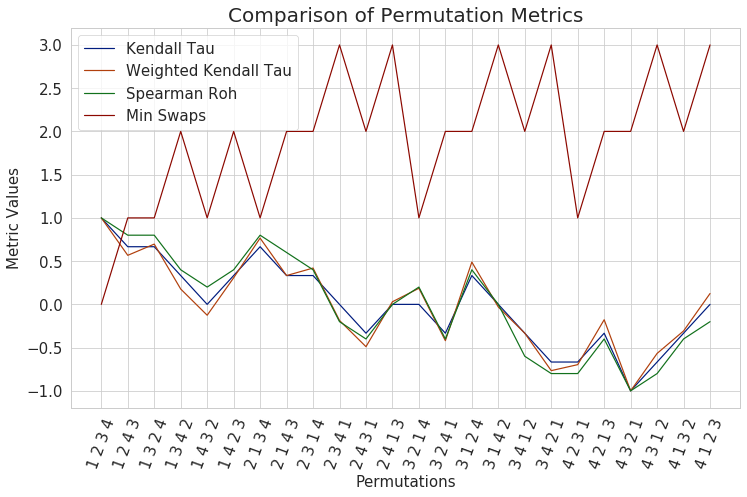

In [25]:
plot_metrics(taus, min_swaps, spears, weighted_taus,permutations)

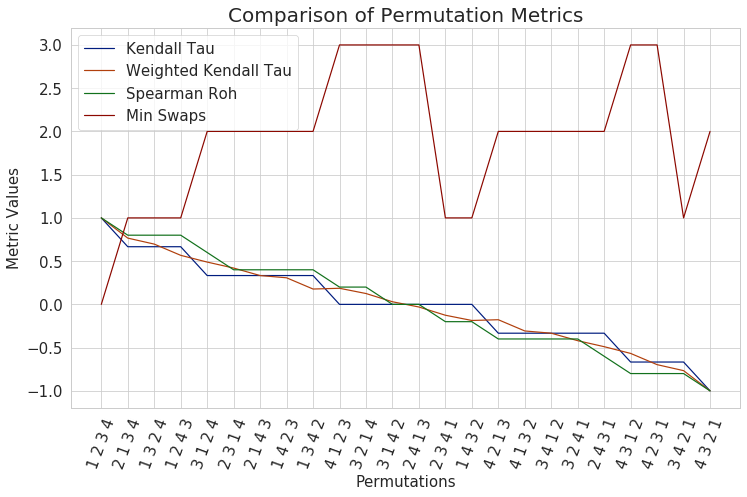

In [26]:
sorted_taus, min_swaps_sorted_by_taus, spears_sorted_by_taus, weighted_taus_sorted_by_taus, permutations_sorted_by_taus = sort_arrays(taus, min_swaps, spears, weighted_taus, permutations, reverse=True)
plot_metrics(sorted_taus, min_swaps_sorted_by_taus, spears_sorted_by_taus, weighted_taus_sorted_by_taus,permutations_sorted_by_taus)

In [101]:
# sorted_min_swaps, taus_sorted_by_min_swaps, spears_sorted_by_min_swaps, permutations_sorted_by_min_swaps = sort_arrays(min_swaps, taus, spears, permutations)
# plot_metrics(taus_sorted_by_min_swaps, sorted_min_swaps, spears_sorted_by_min_swaps,permutations_sorted_by_min_swaps)

TypeError: sort_arrays() missing 1 required positional argument: 'd'